<a href="https://colab.research.google.com/github/XMB234/Bioinformatic-Project---DNA-Classification/blob/main/Bioinformatic_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys
import numpy as np
import sklearn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
url = url = "https://archive.ics.uci.edu/ml/machine-learning-databases/molecular-biology/promoter-gene-sequences/promoters.data"

In [3]:
data = pd.read_csv(url, names = ['Class', 'id', 'Sequence'])

In [4]:
data.head()

,Class,id,Sequence
0,+,S10,\t\ttactagcaatacgcttgcgttcggtggttaagtatgtataat...
1,+,AMPC,\t\ttgctatcctgacagttgtcacgctgattggtgtcgttacaat...
2,+,AROH,\t\tgtactagagaactagtgcattagcttatttttttgttatcat...
3,+,DEOP2,\taattgtgatgtgtatcgaagtgtgttgcggagtagatgttagaa...
4,+,LEU1_TRNA,\ttcgataattaactattgacgaaaagctgaaaaccactagaatgc...


In [5]:
data.duplicated().sum()

np.int64(0)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Class     106 non-null    object
 1   id        106 non-null    object
 2   Sequence  106 non-null    object
dtypes: object(3)
memory usage: 2.6+ KB


In [7]:
classes = data.loc[:, 'Class']

In [8]:
classes.value_counts()

,count
Class,
+,53
-,53


In [9]:
sequences = list(data.loc[:, "Sequence"])
dataset = {}

for i , seq in enumerate(sequences):

  nucleotides = list(seq)
  nucleotides = [x for x in nucleotides if x != '\t']

  nucleotides.append(classes[i])

  dataset[i] = nucleotides

In [10]:
dataset[0]

['t',
 'a',
 'c',
 't',
 'a',
 'g',
 'c',
 'a',
 'a',
 't',
 'a',
 'c',
 'g',
 'c',
 't',
 't',
 'g',
 'c',
 'g',
 't',
 't',
 'c',
 'g',
 'g',
 't',
 'g',
 'g',
 't',
 't',
 'a',
 'a',
 'g',
 't',
 'a',
 't',
 'g',
 't',
 'a',
 't',
 'a',
 'a',
 't',
 'g',
 'c',
 'g',
 'c',
 'g',
 'g',
 'g',
 'c',
 't',
 't',
 'g',
 't',
 'c',
 'g',
 't',
 '+']

In [11]:
dframe = pd.DataFrame(dataset)

In [12]:
dframe

,0,1,2,3,4,5,6,7,8,9,...,96,97,98,99,100,101,102,103,104,105
0,t,t,g,a,t,a,c,t,c,t,...,c,c,t,a,g,c,g,c,c,t
1,a,g,t,a,c,g,a,t,g,t,...,c,g,a,g,a,c,t,g,t,a
2,c,c,a,t,g,g,g,t,a,t,...,g,c,t,a,g,t,a,c,c,a
3,t,t,c,t,a,g,g,c,c,t,...,a,t,g,g,a,c,t,g,g,c
4,a,a,t,g,t,g,g,t,t,a,...,g,a,a,g,g,a,t,a,t,a
5,g,t,a,t,a,c,g,a,t,a,...,t,g,c,g,c,a,c,c,c,t
6,c,c,g,g,a,a,g,c,a,a,...,a,g,c,t,a,t,t,t,c,t
7,a,c,a,a,t,a,t,a,a,t,...,g,a,g,g,t,g,c,a,t,a
8,a,t,g,t,t,g,g,a,t,t,...,a,c,a,t,g,g,a,c,c,a
9,t,g,a,g,a,g,g,a,a,t,...,c,t,a,a,t,c,a,g,a,t


In [13]:
df = dframe.transpose()
df.iloc[:5]

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,t,a,c,t,a,g,c,a,a,t,...,g,c,t,t,g,t,c,g,t,+
1,t,g,c,t,a,t,c,c,t,g,...,c,a,t,c,g,c,c,a,a,+
2,g,t,a,c,t,a,g,a,g,a,...,c,a,c,c,c,g,g,c,g,+
3,a,a,t,t,g,t,g,a,t,g,...,a,a,c,a,a,a,c,t,c,+
4,t,c,g,a,t,a,a,t,t,a,...,c,c,g,t,g,g,t,a,g,+


In [14]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
count,106,106,106,106,106,106,106,106,106,106,...,106,106,106,106,106,106,106,106,106,106
unique,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,2
top,t,a,a,c,a,a,a,a,a,a,...,c,c,c,t,t,c,c,t,t,+
freq,38,34,30,30,36,42,38,34,33,36,...,36,42,31,33,35,32,29,29,34,53


In [15]:
import matplotlib.pyplot as plt

def visualize_target_pie(df, column, filename="target_piechart.png"):
    # Hitung frekuensi masing-masing kelas
    counts = df[column].value_counts()
    labels = counts.index
    sizes = counts.values
    colors = ['#4C72B0', '#55A868']  # Biru & Hijau

    # Buat pie chart
    plt.figure(figsize=(6, 6))
    plt.pie(
        sizes,
        labels=labels,
        colors=colors,
        autopct='%1.1f%%',
        startangle=90,
        counterclock=False,
        wedgeprops={'linewidth': 1, 'edgecolor': 'white'},
        textprops={'fontsize': 12}
    )

    # Judul
    plt.title("Distribution of Promoters and Non-Promoters", fontsize=14, fontweight='bold')

    # Buat layout rapi dan simpan
    plt.tight_layout()
    plt.savefig(filename, dpi=300)
    plt.show()


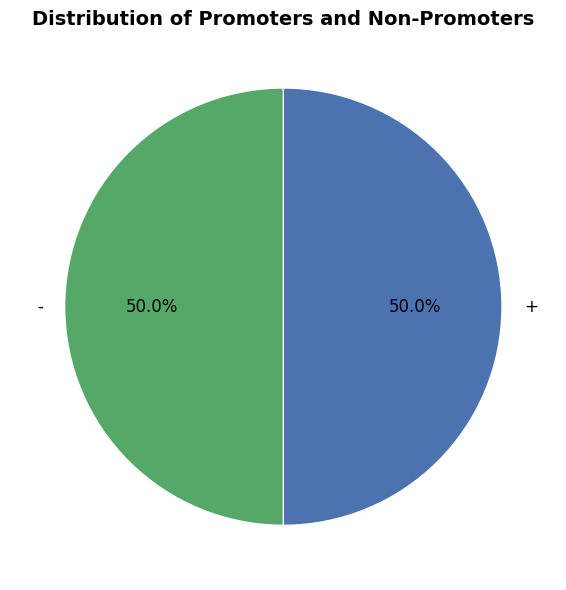

In [16]:
visualize_target_pie(df, column=57)

In [17]:
details = pd.DataFrame({col: df[col].value_counts() for col in df.columns})

In [18]:
details

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
+,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.0
-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.0
a,26.0,34.0,30.0,22.0,36.0,42.0,38.0,34.0,33.0,36.0,...,23.0,24.0,28.0,27.0,25.0,22.0,26.0,24.0,27.0,NaN
c,27.0,22.0,21.0,30.0,19.0,18.0,21.0,20.0,22.0,22.0,...,36.0,42.0,31.0,32.0,21.0,32.0,29.0,29.0,17.0,NaN
g,15.0,24.0,28.0,28.0,29.0,22.0,17.0,20.0,19.0,20.0,...,26.0,18.0,24.0,14.0,25.0,22.0,28.0,24.0,28.0,NaN
t,38.0,26.0,27.0,26.0,22.0,24.0,30.0,32.0,32.0,28.0,...,21.0,22.0,23.0,33.0,35.0,30.0,23.0,29.0,34.0,NaN


In [19]:
numerical_df = pd.get_dummies(df)
numerical_df.head()

,0_a,0_c,0_g,0_t,1_a,1_c,1_g,1_t,2_a,2_c,...,55_a,55_c,55_g,55_t,56_a,56_c,56_g,56_t,57_+,57_-
0,False,False,False,True,True,False,False,False,False,True,...,False,False,True,False,False,False,False,True,True,False
1,False,False,False,True,False,False,True,False,False,True,...,True,False,False,False,True,False,False,False,True,False
2,False,False,True,False,False,False,False,True,True,False,...,False,True,False,False,False,False,True,False,True,False
3,True,False,False,False,True,False,False,False,False,False,...,False,False,False,True,False,True,False,False,True,False
4,False,False,False,True,False,True,False,False,False,False,...,True,False,False,False,False,False,True,False,True,False


In [20]:
df = numerical_df.drop(columns=['57_-']).rename(columns={'57_+': 'Class'})
df.head()

,0_a,0_c,0_g,0_t,1_a,1_c,1_g,1_t,2_a,2_c,...,54_t,55_a,55_c,55_g,55_t,56_a,56_c,56_g,56_t,Class
0,False,False,False,True,True,False,False,False,False,True,...,False,False,False,True,False,False,False,False,True,True
1,False,False,False,True,False,False,True,False,False,True,...,False,True,False,False,False,True,False,False,False,True
2,False,False,True,False,False,False,False,True,True,False,...,False,False,True,False,False,False,False,True,False,True
3,True,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,True,False,False,True
4,False,False,False,True,False,True,False,False,False,False,...,True,True,False,False,False,False,False,True,False,True


In [21]:
df = df.astype(int)

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.drop('Class', axis=1).values,
    df['Class'].values,
    test_size=0.25,
    random_state=1
)

In [23]:
X_train.dtype

dtype('int64')

In [25]:
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Konfigurasi
seed = 1
kfold = KFold(n_splits = 10, shuffle = True, random_state = seed)
scoring = 'accuracy'

# Model yang akan diuji
models = {
    "KNN": KNeighborsClassifier(n_neighbors=3),
    "Gaussian Process": GaussianProcessClassifier(1.0 * RBF(1.0)),
    "Decision Tree": DecisionTreeClassifier(max_depth=5),
    "Random Forest": RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    "MLP Neural Net": MLPClassifier(alpha=1, max_iter=1000),
    "AdaBoost": AdaBoostClassifier(),
    "Naive Bayes": GaussianNB(),
    "SVM Linear": SVC(kernel='linear'),
    "SVM RBF": SVC(kernel='rbf'),
    "SVM Sigmoid": SVC(kernel='sigmoid')
}

# Menyimpan Hasil
results = []

# Loop Evaluasi
for name, model in models.items():
  cv_scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
  model.fit(X_train, y_train)
  preds = model.predict(X_test)

  acc = accuracy_score(y_test, preds)
  report = classification_report(y_test, preds, output_dict=True)

  results.append({
      "Model": name,
      "CV Mean Acc": round(cv_scores.mean(), 4),
      "CV Std": round(cv_scores.std(), 4),
      "Test Acc": round(acc, 4),
      "Precision_Pos": round(report['1']['precision'], 4),
      "Recall_Pos": round(report['1']['recall'], 4),
      "F1_Pos": round(report['1']['f1-score'], 4)
  })

In [26]:
# Hasil akhir dalam dataframe
results_df = pd.DataFrame(results).sort_values(by="Test Acc", ascending=False)
results_df

,Model,CV Mean Acc,CV Std,Test Acc,Precision_Pos,Recall_Pos,F1_Pos
7,SVM Linear,0.9125,0.0976,0.9630,0.9091,1.0,0.9524
4,MLP Neural Net,0.9125,0.0976,0.9259,0.8333,1.0,0.9091
9,SVM Sigmoid,0.9250,0.1000,0.9259,0.8333,1.0,0.9091
8,SVM RBF,0.8750,0.1118,0.9259,0.8333,1.0,0.9091
6,Naive Bayes,0.8375,0.1125,0.9259,0.8333,1.0,0.9091
1,Gaussian Process,0.8554,0.1606,0.8889,0.7692,1.0,0.8696
5,AdaBoost,0.8982,0.1230,0.8889,0.7692,1.0,0.8696
0,KNN,0.7964,0.1023,0.7778,0.6250,1.0,0.7692
2,Decision Tree,0.7071,0.1303,0.7407,0.6000,0.9,0.7200
3,Random Forest,0.6196,0.1379,0.5185,0.4118,0.7,0.5185


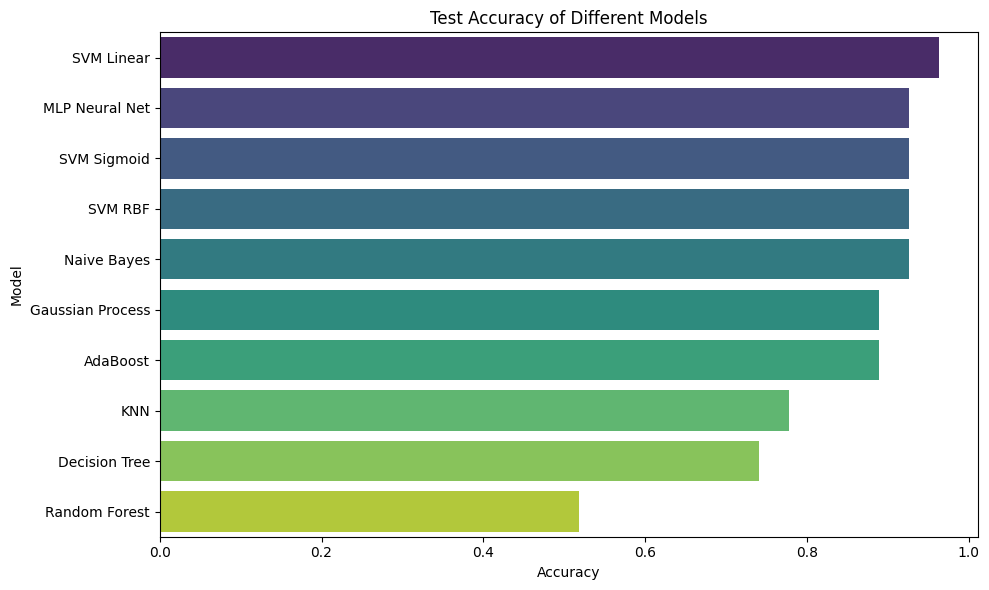

In [27]:
plt.figure(figsize=(10,6))
sns.barplot(x='Test Acc', y='Model', data=results_df, palette='viridis')
plt.title("Test Accuracy of Different Models")
plt.xlabel("Accuracy")
plt.ylabel("Model")
plt.tight_layout()
plt.show()

In [28]:
!pip install lazypredict

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.7/24.7 MB 64.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 63.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.7/242.7 kB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 733.8/733.8 kB 36.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.5/118.5 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.2/196.2 kB 13.7 MB/s eta 0:00:00


In [29]:
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

# Inisiasi dan evaluasi semua model
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# Tampilkan Hasil Evaluasi model
print(models)

# Pilih model terbaik berdasarkan akurasi (atau metrik lain, misalnya F1 score, AUC, dll.)
best_model_name = models.sort_values(by='Accuracy', ascending=False).index[0]
best_model = models.loc[best_model_name]

print(f"Best model : {best_model_name}")

  0%|          | 0/32 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 43, number of negative: 36
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000779 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 351
[LightGBM] [Info] Number of data points in the train set: 79, number of used features: 117
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.544304 -> initscore=0.177681
[LightGBM] [Info] Start training from score 0.177681
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

## Fine Tuning

In [30]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Inisiasi model PassiveAggressiveClassifier
model = PassiveAggressiveClassifier()

# Definisikan parameter yang akan diuji
param_grid = {
    'C': [0.001, 0.01, 0.1, 1.0, 10.0], # Regulasi
    'max_iter': [1000, 2000],           # Maksimum Iterasi
    'tol': [1e-2 ,1e-3, 1e-4, 1e-5],    # Toleransi untuk berhenti
    'loss': ['hinge', 'squared_hinge'], # Fungsi Kerugian
    'fit_intercept': [True, False],      # Apakah ada Intersep
    'shuffle': [True, False]            # Apakah mengacak sampel
}

# Inisiasi GridSearchCV
grid_search_pac = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Fit model ke data latih (pastikan sudah siap)
grid_search_pac.fit(X_train, y_train)

# Menampilkan parameter terbaik dan skor validasi
print("Best Parameters:", grid_search_pac.best_params_)
print(f"Best Score: {grid_search_pac.best_score_ * 100:.2f}%")

# Gunakan model terbaik untuk prediksi pada data uji
best_model_pac = grid_search_pac.best_estimator_
y_pred_pac = best_model_pac.predict(X_test)

# Evaluasi akurasi pada data uji
accuracy = accuracy_score(y_test, y_pred_pac)
print(f"Akurasi model terbaik pada data test: {accuracy * 100:.2f}%")

Fitting 5 folds for each of 320 candidates, totalling 1600 fits
Best Parameters: {'C': 0.001, 'fit_intercept': True, 'loss': 'hinge', 'max_iter': 1000, 'shuffle': True, 'tol': 0.01}
Best Score: 91.17%
Akurasi model terbaik pada data test: 81.48%


In [41]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Inisialisasi model SVM Linear
model = SVC(kernel='linear')

# Definisikan grid parameter untuk dicoba
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],   # Regularisasi
    'tol': [1e-2, 1e-3, 1e-4],      # Toleransi berhenti
    'max_iter': [1000, 2000, 5000], # Maksimum iterasi
    'shrinking': [True, False],     # Gunakan heuristik shrinking
    'probability': [False]          # (True memakan waktu lama, matikan jika tidak perlu)
}

# Inisialisasi GridSearchCV
grid_search_svm = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Latih model
grid_search_svm.fit(X_train, y_train)

# Menampilkan parameter terbaik dan skor validasi
print("Best Parameters:", grid_search_svm.best_params_)
print(f"Best Score: {grid_search_svm.best_score_ * 100:.2f}%")

# Gunakan model terbaik untuk prediksi pada data uji
best_model_svm = grid_search_svm.best_estimator_
y_pred_svm = best_model_svm.predict(X_test)


# Evaluasi performa pada data uji
accuracy = accuracy_score(y_test, y_pred_svm)
print(f"Akurasi model terbaik pada data test: {accuracy * 100:.2f}%")


Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best Parameters: {'C': 0.01, 'max_iter': 1000, 'probability': False, 'shrinking': True, 'tol': 0.01}
Best Score: 91.17%
Akurasi model terbaik pada data test: 88.89%


In [52]:
# Konversi probabilitas menjadi kelas biner (0 atau 1)
y_pred_svm_class = (y_pred_svm > 0.5).astype(int)

In [53]:
df_prediksi_svm = pd.DataFrame({
    "Probabilitas": y_pred_svm.flatten(),
    "Prediksi" : y_pred_svm_class.flatten(),
    "Label Asli" : y_test
})

# Tambahkan kolom apakah prediksi benar atau
df_prediksi_svm["Benar/Salah"] = df_prediksi_svm["Prediksi"] == df_prediksi_svm["Label Asli"]

In [55]:
df_prediksi_svm.head(20)

,Probabilitas,Prediksi,Label Asli,Benar/Salah
0,0,0,0,True
1,1,1,1,True
2,0,0,0,True
3,0,0,0,True
4,1,1,1,True
5,1,1,0,False
6,0,0,0,True
7,0,0,0,True
8,1,1,1,True
9,0,0,0,True


## Deep Learning

In [45]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Bidirectional, LSTM
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, accuracy_score

# Reshape the data for LSTM
X_train_reshaped = X_train.reshape((X_train.shape[0], 57, 4))
X_test_reshaped = X_test.reshape((X_test.shape[0], 57, 4))

model_bi = Sequential([
    Bidirectional(LSTM(128, return_sequences=False), input_shape=(57, 4)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model_bi.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# Training
history = model_bi.fit(
    X_train_reshaped, y_train,  # Use the reshaped data
    validation_split=0.2,
    epochs=20,
    batch_size=16,
    verbose=1
)

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 551ms/step - accuracy: 0.5059 - loss: 0.6954 - val_accuracy: 0.3750 - val_loss: 0.6977
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 240ms/step - accuracy: 0.7714 - loss: 0.6762 - val_accuracy: 0.4375 - val_loss: 0.6967
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 249ms/step - accuracy: 0.5600 - loss: 0.6797 - val_accuracy: 0.5000 - val_loss: 0.6973
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 266ms/step - accuracy: 0.5284 - loss: 0.6824 - val_accuracy: 0.4375 - val_loss: 0.6866
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 194ms/step - accuracy: 0.7400 - loss: 0.6499 - val_accuracy: 0.5625 - val_loss: 0.6759
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 178ms/step - accuracy: 0.7693 - loss: 0.6127 - val_accuracy: 0.6250 - val_loss: 0.6509
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 224ms/step - accuracy: 0.6918 - loss: 0.6447 - val_accuracy: 0.6875 - val_loss: 0.6342
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 223ms/step - accuracy: 0.7294 - loss: 0.6113 - val_accuracy: 0.6875 - val_loss:

In [48]:
from sklearn.metrics import classification_report, accuracy_score

# Prediksi
y_pred_dl = model.predict(X_test_reshaped)

# Konversi probabilitas menjadi kelas biner (0 atau 1)
y_pred_class = (y_pred_dl > 0.5).astype(int)

# Evaluasi akurasi dan classification report
print("Accuracy:", accuracy_score(y_test, y_pred_class))
print(classification_report(y_test, y_pred_class))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step
Accuracy: 0.7777777777777778
              precision    recall  f1-score   support

           0       1.00      0.65      0.79        17
           1       0.62      1.00      0.77        10

    accuracy                           0.78        27
   macro avg       0.81      0.82      0.78        27
weighted avg       0.86      0.78      0.78        27



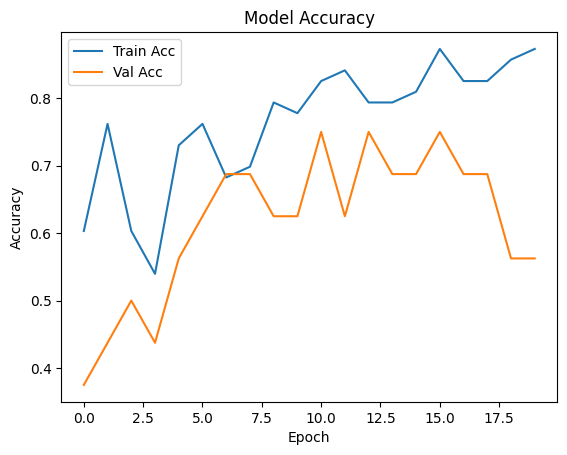

In [49]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Model Accuracy")
plt.show()

In [50]:
df_prediksi = pd.DataFrame({
    "Probabilitas": y_pred_dl.flatten(),
    "Prediksi" : y_pred_class.flatten(),
    "Label Asli" : y_test
})

# Tambahkan kolom apakah prediksi benar atau
df_prediksi["Benar/Salah"] = df_prediksi["Prediksi"] == df_prediksi["Label Asli"]

In [56]:
df_prediksi.head(20)

,Probabilitas,Prediksi,Label Asli,Benar/Salah
0,0.48,0,0,True
1,0.73,1,1,True
2,0.19,0,0,True
3,0.27,0,0,True
4,0.97,1,1,True
5,0.66,1,0,False
6,0.22,0,0,True
7,0.14,0,0,True
8,0.96,1,1,True
9,0.35,0,0,True


## Inference

In [57]:
def one_hot_encode_seq(seq):
  mapping = {
      'a': [1, 0, 0, 0],
      'c': [0, 1, 0, 0],
      'g': [0, 0, 1, 0],
      't': [0, 0, 0, 1]}
  return np.array([mapping.get(nt.lower(), [0, 0, 0, 0]) for nt in seq])

In [59]:
new_seq = "tataatgcgagtaggttgcccttatagtgttggctgctggcaggccaggcattaaa"

In [61]:
encoded_seq = one_hot_encode_seq(new_seq)   # shape: (56, 4)
input_seq = encoded_seq.reshape(1, encoded_seq.shape[0], 4) # shape: (1, 56, 4) → batch 1

In [64]:
prediction_prob = model_bi.predict(input_seq)
prediction_class = int(prediction_prob[0][0] > 0.5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


In [65]:
print(f"Probabilitas sebagai promoter: {prediction_prob[0][0]:.4f}")
print("Hasil prediksi:", "PROMOTER" if prediction_class == 1 else "NON-PROMOTER")

Probabilitas sebagai promoter: 0.1779
Hasil prediksi: NON-PROMOTER


## Inference untuk SVM

In [66]:
import numpy as np

def one_hot_encode_flat(seq):
    mapping = {'a': [1, 0, 0, 0],
               'c': [0, 1, 0, 0],
               'g': [0, 0, 1, 0],
               't': [0, 0, 0, 1]}
    encoded = [mapping.get(nt.lower(), [0, 0, 0, 0]) for nt in seq]
    return np.array(encoded).flatten()

In [68]:
new_sequence = "tataatgcgagtaggttgcccttatagtgttggctgctggcaggccaggcattaaat"

# Validasi panjang
if len(new_sequence) != 57:
    raise ValueError("Sekuens harus 57 nt")

# Encode dan reshape
X_new = one_hot_encode_flat(new_sequence).reshape(1, -1)

# Prediksi dengan model SVM
y_pred = best_model_svm.predict(X_new)
y_prob = best_model_svm.decision_function(X_new)  # jarak dari hyperplane

print("Prediksi:", "PROMOTER" if y_pred[0] == 1 else "NON-PROMOTER")
print(f"Confidence score (decision function): {y_prob[0]:.4f}")


Prediksi: NON-PROMOTER
Confidence score (decision function): -0.3625
